[Sumber data California Housing Price](https://www.kaggle.com/datasets/camnugent/california-housing-prices) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

# **1. Business Problem Understanding**


**Context**

Data set ini merupakan kumpulan data perumahan di kawasan California, Amerika Serikat yang berasal dari sensus yang dilakukan di tahun 1990 yang berisikan data-data demography (income, populasi, house occupancy) di suatu area, lokasi area (latitude, longitude) dan informasi general terkait rumah yang berada di area tersebut (number of rooms, number of bedrooms, age of the house)

**Problem Statement**

Tantangan dari setiap developer perumahan adalah bagaimana menentukan harga perumahan yang tepat serta dimana lokasi untuk membangun perumahan agar tidak salah sasaran ketika menentukan harga dan lokasi perumahannya. developer tentu saja tidak ingin membangun perumahan elit di kawasan yang notabene warga sekitarnya berpenghasilan rendah, atau membangun perumahan yang biasa saja di kawasan elit. Hal ini tentu saja akan berdampak dari penjualan properti rumah tersebut.

**Goals**

Tujuan dari pemodelan ini adalah untuk menentukan harga jual dari suatu rumah berdasarkan fitur-fitur yang ada di seputaran daerah California. Adanya perbedaan pada berbagai fitur yang terdapat pada suatu properti, seperti jumlah kamar, lokasi, pendapatan rata-rata populasi dapat menambah keakuratan prediksi harga jual, yang mana dapat mendatangkan profit bagi setiap developer perumahan yang juga sesuai dengan target marketing dari developer tersebut

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu properti dengan yang lainnya. 

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' prediksi harga jual rumah yang baru, yang mana akan berguna untuk developer dalam menentukan lokasi serta harga rumah di suatu kawasan tertentu

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

# **2. Data Understanding**

- Data berkaitan dengan rumah-rumah yang ditemukan di distrik California tertentu dan beberapa statistik ringkasan tentang mereka berdasarkan data sensus 1990.
- Setiap baris data merepresentasikan informasi terkait properti dan lokasinya

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | Float | A measure of how far west a house is; a higher value is farther west |
| latitude | Float | A measure of how far north a house is; a higher value is farther north |
| housingMedianAge | Float | Median age of a house within a block; a lower number is a newer building |
| totalRooms | Float | Total number of rooms within a block |
| totalBedrooms | Float | Total number of bedrooms within a block |
| population | Float | Total number of people residing within a block |
| households | Float | Total number of households, a group of people residing within a home unit, for a block |
| medianIncome | Float | Median income for households within a block of houses (measured in tens of thousands of US Dollars)|
| medianHouseValue | Float | Median house value for households within a block (measured in US Dollars) |
| oceanProximity | Object | Location of the house w.r.t ocean/sea |

In [139]:
# Import library yang dibutuhkan untuk eksplorasi dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [140]:
# Load Dataset

df = pd.read_csv(r'C:\Users\user\Documents\PYTHON DATA SCIENCE\PURWADHIKA DATA SCIENCE\PURWADHIKA SESSION PRACTICE\Machine Learning\Project modul 3\data_california_house.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


**Exploratory Data Analysis**

In [232]:
# duplikasi data, agar tidak tidak mempengaruhi data asli

df_model = df.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

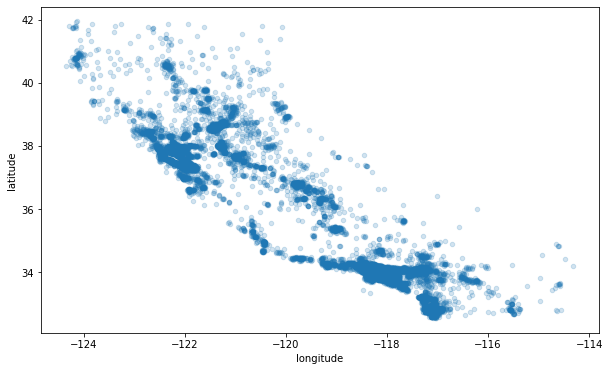

In [241]:
df_model.plot(x='longitude', y='latitude',kind='scatter',alpha=0.2, figsize=(10,6))

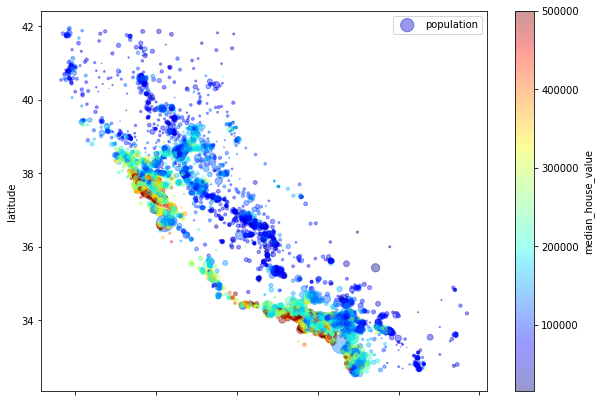

In [242]:
df_model.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=df_model["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

berikut ini adalah tampilan lokasi perumahan berdasarkan letak longitude dan latitudenya. seperti yang sudah dijelaskan di data deskripsi bahwa lokasi perumahan ini berada di California, Amerika Serikat. 

Radius dari setiap circle mewakili populasi dari suatu area, sedangkan warna mewakili harga. terlihat bahwa harga rumah semakin mahal saat lokasinya berada di kawasan pinggir pantai, sedangkan untuk area yang jauh dari kawasan pantai terlihat harganya lebih murah

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

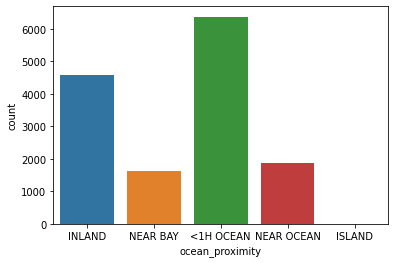

In [245]:
sns.countplot(data=df_model,x='ocean_proximity')

dari data ocean proximity atau jarak rumah dengan laut, dapat terlihat bahwa penduduk california paling banyak bertempat tinggal area yang tidak jauh dari laut / berjarak kurang 1 jam dari laut, hal ini sesuai dengan kebiasaan penduduk california yang memang menyukai laut, karena California memang terkenal karena kawasan pantainya

In [247]:
df_model.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Deskriptif Statistic dari dataset yang merangkum central tendensi, dispersi, dan distribusi kumpulan data. Dari informasi ini terlihat nilai min dan max dari setiap feature cukup jauh yang menunjukkan potensi distribusi data tidak normal dan adanya outlier yang banyaknya cukup signifikan.

# **3. Data Preprocessing**

Pada tahap data preprocessing, kita akan melakukan pengecekan terhadap data yang ada. pengecekan meliputi :

* distribusi data
* missing value
* data duplikasi
* korelasi data
* outlier

tujuan dari pengecekan ini adalah untuk menentukan feature engineering yang tepat terhadap feature - feature yang ada, sehingga nantinya akan didapatkan data yg 'bersih'
yang siap diolah kedalam model machine learning yang akan kita gunakan nantinya.

In [142]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'null%', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,null%,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-117.21, -122.39]"
1,latitude,float64,0,0.00,836,"[34.91, 39.38]"
2,housing_median_age,float64,0,0.00,52,"[52.0, 7.0]"
3,total_rooms,float64,0,0.00,5227,"[518.0, 1025.0]"
4,total_bedrooms,float64,137,0.95,1748,"[160.0, 1180.0]"
5,population,float64,0,0.00,3498,"[1780.0, 76.0]"
6,households,float64,0,0.00,1649,"[704.0, 330.0]"
7,median_income,float64,0,0.00,9797,"[8.5294, 3.6094]"
8,ocean_proximity,object,0,0.00,5,"[<1H OCEAN, ISLAND]"
9,median_house_value,float64,0,0.00,3548,"[83400.0, 116600.0]"


**Cek distribusi data**

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

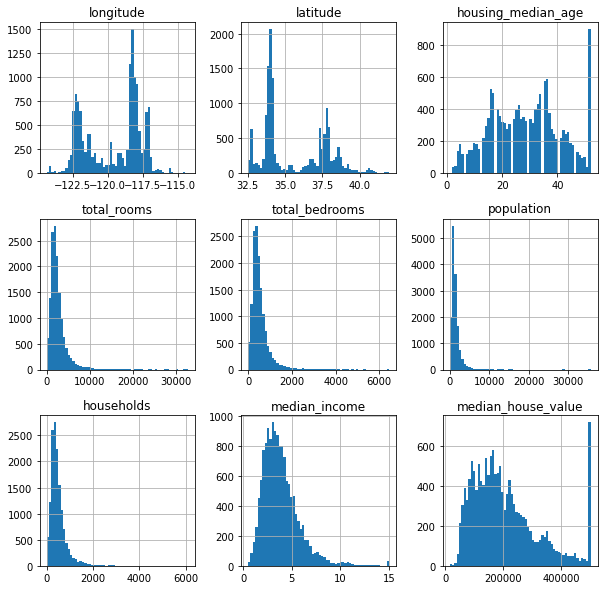

In [143]:
df_model.hist(bins=60,figsize=(10,10))

Berdasarkan graphic distribusi data, dapat terlihat bahwa fitur2 yang ada kebanyakan berdistribusi tidak normal. Selain itu sepintas dapat terlihat pula bahwa terdapat 
outlier data yang cukup mencolok di kolom housing median age, dan kolom median house value.
dalam kasus linear regression, persebaran data yang tidak normal ini akan dapat mempengaruhi keakuratan model, sehingga untuk feature-feature yang berdistribusi tidak normal, nantinya akan diubah distribusinya menjadi / mendekati distribusi normal dengan cara mengubah skala nya menjadi skala logaritmic dengan library sklearn yaitu power transformer. 

***"Logarithm transformation (or log transform) is one of the most commonly used mathematical transformations in feature engineering. It decreases the effect of the outliers, due to the normalization of magnitude differences and the model become more robust."***
https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114

**Cek missing value**

In [144]:
df_model.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [145]:
col_with_missing = [col for col in df_model.columns if df_model[col].isnull().any()]

In [146]:
df_model[df_model['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
88,-121.47,38.61,31.0,1072.0,NaN,781.0,281.0,1.6563,INLAND,65800.0
119,-117.28,34.26,18.0,3895.0,NaN,1086.0,375.0,3.3672,INLAND,133600.0
251,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND,158700.0
340,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,146500.0
410,-122.42,40.44,16.0,994.0,NaN,495.0,181.0,2.1875,INLAND,76400.0
...,...,...,...,...,...,...,...,...,...,...
13856,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,150400.0
13932,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN,231000.0
13989,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN,221500.0
14308,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN,170600.0


Terdapat data missing pada kolom total_bedrooms, untuk permasalahan missing value ini ada 2 cara yang bisa dilakukan yaitu : 

1. drop column with missing value :
   merupakan cara yang paling sederhana, namun berpotensi untuk kehilangan banyak data, jika data yang missing terlalu banyak
    
2. Imputation :
   mengisi kolom yang hilang dengan dengan nilai tertentu. bisa berasal dari nilai rata-rata, median, atau bahkan berdasarkan regresi

**Cek data duplicate**

In [147]:
df_model.duplicated().sum()

0

Tidak ditemukan data duplicate pada data yang ada, sehingga dapat dilanjutkan ke proses feature engineering selanjutnya. Namun jika ditemukan data duplikat maka data tersebut akan dihilangkan sehingga tidak mempengaruhi model nantinya

**Cek Corelation**

<AxesSubplot:>

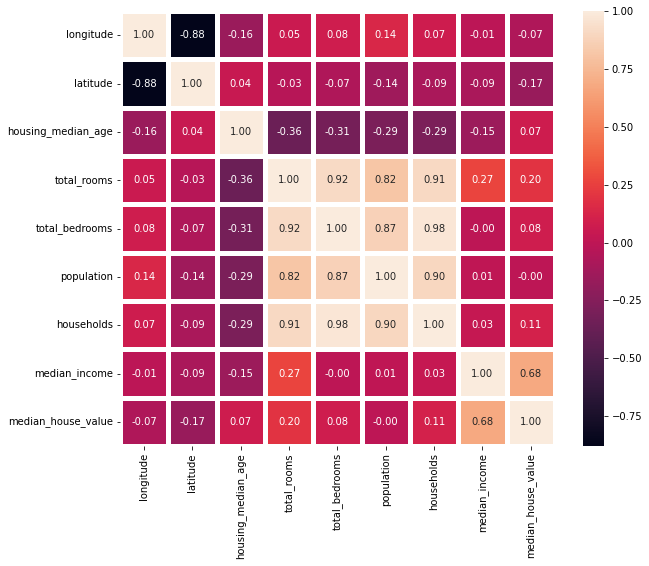

In [148]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr('spearman'),annot=True,square=True,linewidths=5,fmt='.2f')

Koefisien korelasi berkisar antara -1 sampai 1. Bila mendekati 1 berarti terdapat korelasi positif yang kuat; misalnya, median house value cenderung naik ketika median income naik. 

Ketika koefisien mendekati -1, berarti ada korelasi negatif yang kuat. Kita dapat melihat korelasi negatif kecil antara garis latitude dan median house value (yaitu, harga memiliki sedikit kecenderungan untuk turun saat perumahan berada di utara). 

Terakhir, koefisien mendekati nol berarti tidak ada korelasi linier.

**Cek outlier**

<AxesSubplot:>

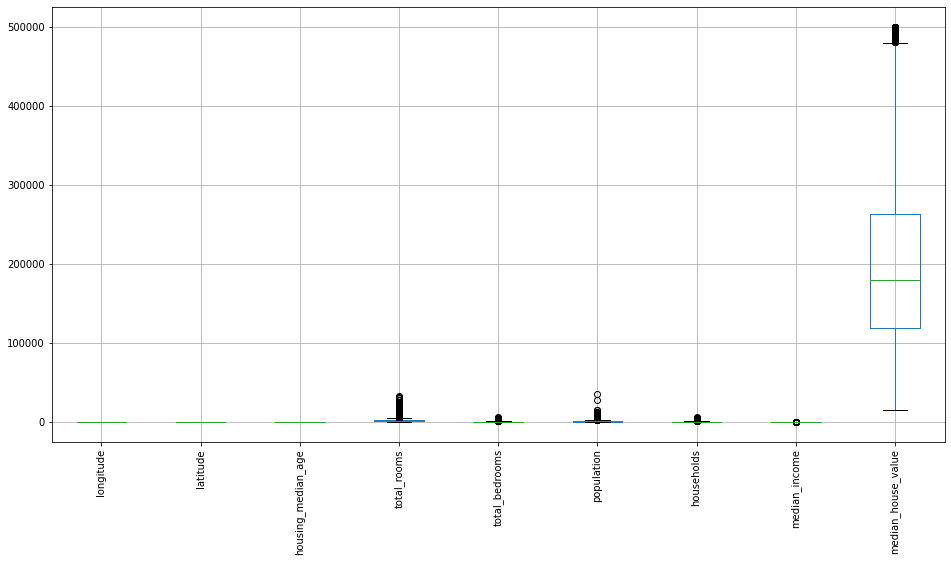

In [150]:
plt.figure(figsize=(16,8))
df.boxplot(rot=90)

berdasarkan graphic diatas dapat dilihat ada beberapa feature yang memiliki outlier. Outlier adalah pengamatan yang jauh dari titik data lainnya
dalam sampel acak dari suatu populasi. Dalam ilmu data, kita sering ingin membuat asumsi tentang populasi tertentu. Namun adanya nilai ekstrem dapat berdampak signifikan pada kesimpulan hasil interpretasi yang kita amati dari data atau model machine learning. Dengan deteksi dan penanganan terterntu, anomali ini dapat dilihat sebagai bagian dari populasi yang berbeda.

walaupun keberadaan outlier dapat mempengaruhi model machine learning kita, tapi tidak selamanya outlier harus dihilangkan. Adanya outlier dalam suatu data bukan berarti data tersebut buruk, bisa jadi outlier yang ada mengandung informasi yang berguna yang bisa dimanfaatkan untuk analisis data.

untuk kasus kali ini, outlier yang ada akan dihilangkan yang memiliki nilai paling extreme saja, karena jika semua outliernya dihilangkan maka akan sedikit sekali data yang tersisa. sehingga tentu saja tidak merepresentasikan data yang sebenarnya.

dengan melihat grafik distribution plot, terlihat ada 2 buah feature yang memiliki outlier yg cukup ekstrem nilainya dibanding data yang lain. yaitu kolom housing median age dan kolom median house value, kedua kolom ini yang akan kita hilangkan outlier extreme nya. sedangkan untuk kolom yg lain akan kita biarkan saja outlier nya karena jika dihilangkan, maka informasi yang tersedia menjadi sedikit sekali

<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

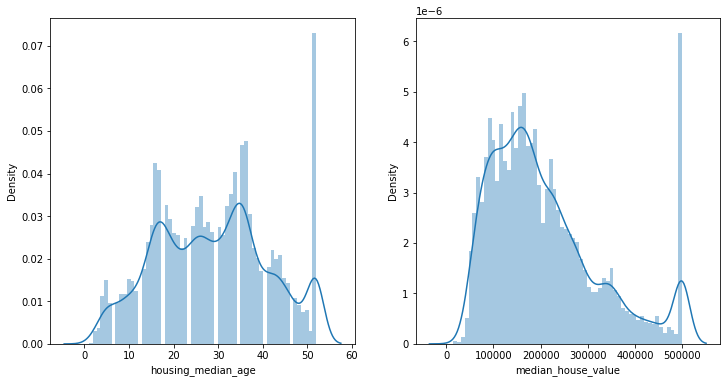

In [214]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(df['housing_median_age'],bins=60)

plt.subplot(1,2,2)
sns.distplot(df['median_house_value'],bins=60)

In [151]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

<AxesSubplot:xlabel='housing_median_age'>

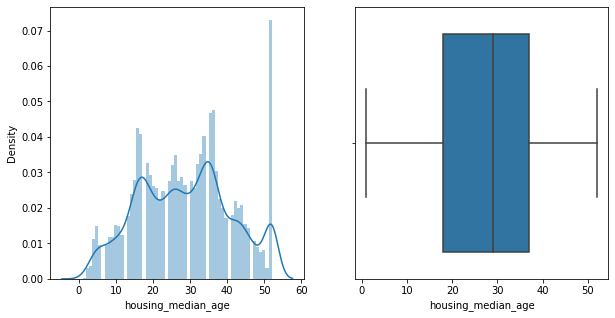

In [152]:
# cek outlier feature housing median age

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_model['housing_median_age'],bins=60)

plt.subplot(1,2,2)
sns.boxplot(df_model['housing_median_age'],)

In [153]:
find_anomalies(df_model['housing_median_age'])

IQR: 19.0
limit_bawah: -10.5
limit_atas: 65.5


In [154]:
pd.DataFrame(df_model['housing_median_age'].describe())

,housing_median_age
count,14448.000000
mean,28.618702
std,12.596694
min,1.000000
25%,18.000000
50%,29.000000
75%,37.000000
max,52.000000


In [155]:
df_model[df_model['housing_median_age']>=45]['housing_median_age'].value_counts().head()

52.0    896
45.0    189
46.0    176
47.0    132
48.0    111
Name: housing_median_age, dtype: int64

extreme outlier yang ada pada feature housing median age adalah housing median age yang bernilai 52. terlihat ada 896 data yang bernilai 52. jika dilihat dengan distribution plot jelas sekali terlihat mencolok dibandingkan data yg lain. outlier extreme ini akan kita hilangkan agar tidak terjadi bias sama pemodelan nanti

In [156]:
# remove outlier feature housing median age

df_model = df_model.drop(df_model[df_model['housing_median_age']==52].index)
df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


<AxesSubplot:xlabel='median_house_value'>

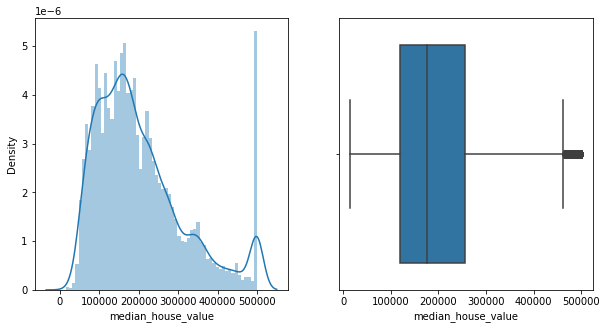

In [157]:
# cek outlier feature median house value

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_model['median_house_value'],bins=60)

plt.subplot(1,2,2)
sns.boxplot(df_model['median_house_value'],)


In [158]:
pd.DataFrame(df_model['median_house_value'].describe())

,median_house_value
count,13552.000000
mean,202258.681302
std,112074.451189
min,14999.000000
25%,118300.000000
50%,176750.000000
75%,256150.000000
max,500001.000000


In [159]:
df_model[df_model['median_house_value']>450000]['median_house_value'].value_counts().head()

500001.0    552
500000.0     10
475000.0      5
483300.0      5
450400.0      3
Name: median_house_value, dtype: int64

pada feature median house value, extreme outlier nya adalah yang bernilai 500001 yang berjumlah 552. sangat mencolok dibanding data sebelumnya. extreme outlier ini juga akan kita hilangkan supaya tidak mempengaruhi model machine learning nantinya. 

In [215]:
df_model = df_model.drop(df_model[df_model['median_house_value']==500001.0].index)  
df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,3.671480,0.322517,3.018051
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,6.478022,0.167939,3.810440
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,2.518000,0.474980,3.051000
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,4.622754,0.251295,3.628743
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0,6.495068,0.153773,2.718249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,6.000000,0.174277,3.251142
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,5.349282,0.174419,3.095694
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0,3.641221,NaN,1.791349
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0,4.540598,0.234353,2.247863


In [161]:
pd.DataFrame(df_model['median_house_value'].describe())

,median_house_value
count,13000.000000
mean,189616.084385
std,95758.531185
min,14999.000000
25%,115675.000000
50%,171600.000000
75%,243100.000000
max,500000.000000


## **Penambahan Feature**

Dalam menilai harga suatu rumah, sebenarnya informasi jumlah kamar di suatu area tidak terlalu berguna. Yang kita inginkan sebenarnya adalah jumlah kamar per KK (kartu keluarga ). karena biasanya jumlah kamar yang ada dalam suatu rumah akan berpengaruh terhadap harga. Demikian pula, jumlah kamar tidur sendiri tidak terlalu berguna, kita mungkin ingin membandingkannya dengan jumlah kamar yang ada. Dan banyaknya anggota keluarga dalam per KK juga sepertinya merupakan kombinasi atribut yang menarik untuk dilihat, karena jumlah anggota keluarga biasanya berhubungan dengan luas atau tidaknya rumah tersebut yang mana tentu saja berpengaruh terhadap harga rumah.

In [162]:
df_model["rooms_per_household"] = df_model["total_rooms"]/df_model["households"]

df_model["bedrooms_per_room"] = df_model["total_bedrooms"]/df_model["total_rooms"]

df_model["population_per_household"]=df_model["population"]/df_model["households"]

In [163]:
df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,3.671480,0.322517,3.018051
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,6.478022,0.167939,3.810440
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,2.518000,0.474980,3.051000
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,4.622754,0.251295,3.628743
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0,6.495068,0.153773,2.718249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,6.000000,0.174277,3.251142
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,5.349282,0.174419,3.095694
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0,3.641221,NaN,1.791349
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0,4.540598,0.234353,2.247863


In [164]:
df_model.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,13000.0,NaN,NaN,NaN,-119.475048,1.979977,-124.3,-121.53,-118.445,-117.97,-114.31
latitude,13000.0,NaN,NaN,NaN,35.585548,2.14951,32.54,33.92,34.24,37.67,41.95
housing_median_age,13000.0,NaN,NaN,NaN,26.955615,11.425619,1.0,17.0,27.0,36.0,51.0
total_rooms,13000.0,NaN,NaN,NaN,2672.960308,2230.543012,2.0,1458.0,2143.0,3184.0,32627.0
total_bedrooms,12873.0,NaN,NaN,NaN,548.897615,433.255534,2.0,299.0,442.0,661.0,6445.0
population,13000.0,NaN,NaN,NaN,1469.816231,1180.573084,3.0,808.0,1203.0,1778.25,35682.0
households,13000.0,NaN,NaN,NaN,509.058385,391.662972,2.0,283.0,416.0,615.0,6082.0
median_income,13000.0,NaN,NaN,NaN,3.689501,1.561164,0.4999,2.54295,3.475,4.60565,15.0001
ocean_proximity,13000,5,<1H OCEAN,5818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
median_house_value,13000.0,NaN,NaN,NaN,189616.084385,95758.531185,14999.0,115675.0,171600.0,243100.0,500000.0


In [165]:
df_model.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.662881
total_rooms                 0.148295
rooms_per_household         0.115102
households                  0.095777
total_bedrooms              0.076341
population                  0.018212
housing_median_age          0.011614
longitude                  -0.015219
population_per_household   -0.026574
latitude                   -0.177711
bedrooms_per_room          -0.229117
Name: median_house_value, dtype: float64

Setelah melakukan penambahan feature, ternyata feature bedrooms per room memiliki korelasi yang lebih kuat terhadap feature median house value daripada feature jumlah keseluruhan kamar atau kamar tidur. Sepertinya rumah yang memiliki jumlah ratio bedroom/room lebih sedikit memiliki kecenderungan harganya lebih mahal. jumlah kamar per KK juga terlihat lebih informatif dibandingkan jumlah kamar dalam suatu area. tentu saja semakin besar rumah, maka semakin mahal harganya

In [166]:
df_model.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              127
population                    0
households                    0
median_income                 0
ocean_proximity               0
median_house_value            0
rooms_per_household           0
bedrooms_per_room           127
population_per_household      0
dtype: int64

Pengecekan ulang terhadap missing value dari data, ditemukan ternyata sekarang feature bedrooms per room ada terdapat missing value, hal ini wajar karena feature ini merupakan hasil dari pembagian antara total bedrooms dengan household. missing value ini akan di handle dengan menggunakan iterative imputer nantinya

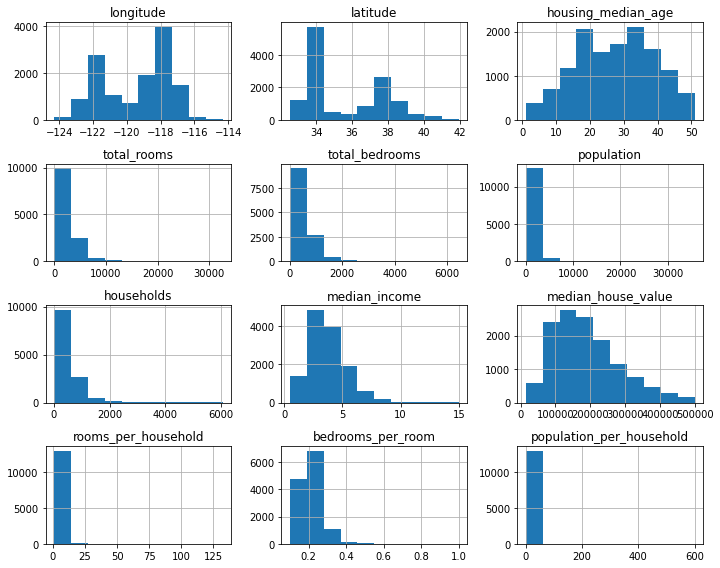

In [218]:
df_model.hist(figsize=(10,8))
plt.tight_layout()

pengecekan ulang terhadap distribusi feature-feature yang baru ditambahkan, terlihat bahwa distribusi nya juga tidak normal. nantinya akan kita scaling juga dengan menggunakan logaritmic scale

**Feature Engineering**

***Scheme***

target : median house value

for categorical data :
* OneHotEncoding : ocean proximity

for numerical data :
* iterative imputer : total bedrooms , bedrooms per room
* PowerTransformer (log Scale) : housing median age, total rooms, total bedrooms, population, household, median income, rooms per household, bedrooms per room, population per household
* passthrough : longitude, latitude

In [167]:
df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,3.671480,0.322517,3.018051
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,6.478022,0.167939,3.810440
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,2.518000,0.474980,3.051000
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,4.622754,0.251295,3.628743
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0,6.495068,0.153773,2.718249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,6.000000,0.174277,3.251142
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,5.349282,0.174419,3.095694
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0,3.641221,NaN,1.791349
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0,4.540598,0.234353,2.247863


merupakan suatu hal yang wajar dalam suatu data memiliki skala nilai yang berbeda-beda di setiap variabel nya. misal suatu variabel dalam feet, sedangkan variabel lain dalam meter, dan sebagainya.
beberapa model machine learning algorithm dapat bekerja dengan baik jika semua variabel nya berada dalam skala yang sama, seperti scaling semua variabel menjadi antara 0-1, ini disebut dengan normalization. Ini mempengaruhi algoritma yang menggunakan jumlah bobot input, seperti model linier dan neural network, serta model yang menggunakan ukuran jarak seperti SVM dan KNN.
oleh karena sebaiknya dilakukan scaling untuk data inputan, dan bahkan mencoba untuk mengubah distribusi data menjadi normal / lebih sesuai dengan distribusi gaussian probability menggunakan power transformer.
hal ini juga berlaku untuk variabel output atau target variabel seperti numerikal value yang diprediksi ketika modeling menggunakan algorithma yang bertujuan untuk masalah regresi problem seperti linear regression dan sebagainya.

***"For regression problems, it is often desirable to scale or transform both the input and the target variables."*** https://machinelearningmastery.com/how-to-transform-target-variables-for-regression-with-scikit-learn/

untuk variabel inputan kita akan menggunakan library sklearn yaitu ["PowerTransformer"](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html) untuk mengubah skala nya menjadi logaritmic, sedangkan untuk output hasil dari modelingnya juga akan diubah skalanya menjadi logaritmic menggunakan library sklearn ["TransformTargetRegressor"](https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html), namun akan diubah diubah kembali menjadi seperti semula ketika interpretasi.

In [216]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [170]:
categorical_col = ['ocean_proximity']
scale_col = [
'housing_median_age',
'total_rooms',
'population',
'households',
'median_income',
'rooms_per_household',
'population_per_household' 
 ]


onehot = OneHotEncoder(drop='first', handle_unknown='ignore')

numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer()),
    ('scaler',PowerTransformer(method='box-cox'))
])

transformer = ColumnTransformer([
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_col),
        ('imp_scal', numerical_transformer, ['total_bedrooms', 'bedrooms_per_room']),
        ('scaler', PowerTransformer(method='box-cox'),scale_col)
],remainder='passthrough')

**Data Splitting**

In [171]:
X = df_model.drop(['median_house_value'],axis=1)
y = df_model['median_house_value']

**Train Test Splitting**

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

**Cross Validation**

In [173]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [219]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-54502.06261691 -56556.79806833 -59045.9397236  -59104.17592808
 -58653.70421042] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-38583.04338474 -39649.41064554 -40265.95809287 -40666.57788561
 -41081.92986133] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.22640838 -0.2252067  -0.22129272 -0.23978902 -0.23640676] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-50829.34424109 -52916.5875381  -52799.77362076 -52372.71225656
 -53490.69063483] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-34361.1952596  -35735.11961722 -35278.49888771 -34641.76369293
 -35783.05093181] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


In [220]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-57572.536109,1796.958232,-40049.383974,872.251921,-0.229821,0.007048
1,KNN Regressor,-52481.821658,900.057544,-35159.925678,572.652579,-0.194730,0.003007
2,DecisionTree Regressor,-65987.792243,2767.298497,-44266.253077,1480.873337,-0.253413,0.010092
3,RandomForest Regressor,-46950.506516,1837.933128,-30896.973379,842.435447,-0.171603,0.005396
4,XGBoost Regressor,-45149.269932,1905.510021,-29501.869352,1009.784141,-0.163516,0.002549


In [174]:
from sklearn.model_selection import cross_validate

lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)


log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)


linreg_pipe = Pipeline([('transformer', transformer), ('linreg', log_lr)])
knn_pipe = Pipeline([('transformer', transformer), ('knn', log_knn)])
dt_pipe = Pipeline([('transformer', transformer), ('dt', log_dt)]) 
rf_pipe = Pipeline([('transformer', transformer), ('rf', log_rf)])
xgb_pipe = Pipeline([('transformer', transformer), ('xgboost', log_xgb)])

metric = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error',]

def model_evaluation(model, metric):
    model_cv = cross_validate(model, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=1), scoring = metric, return_train_score=True)
    return model_cv

linreg_pipe_cv_score = model_evaluation(linreg_pipe, metric)
knn_pipe_cv_score = model_evaluation(knn_pipe, metric)
dt_pipe_cv_score = model_evaluation (dt_pipe, metric)
rf_pipe_cv_score = model_evaluation(rf_pipe, metric)
xgb_pipe_cv_score = model_evaluation(xgb_pipe, metric)


Metric yang akan digunakan untuk mengukur kinerja dari suatu algoritma dalam masalah regressi adalah dengan menghitung Root Mean Square Error, Mean Square Error dan Mean Absolute Error.

Root Mean Square Error (RMSE), adalah akar jumlah dari kesalahan kuadrat atau selisih antara nilai sebenarnya dengan nilai prediksi yang telah ditentukan dibagi dengan jumlah data. 

Mean Square Error sama halnya dengan RMSE, hanya saja tidak menggunakan proses akar. Pada tahap ini, jika nilai error nya semakin besar maka semakin besar nilai MSE yang dihasilkan. 

MAE atau Mean Absolute Error menunjukkan nilai kesalahan rata-rata yang error dari nilai sebenarnya dengan nilai prediksi. Sedangkan Mean Absolute Percentage Error adalah lanjutan dari penentuan nilai MAE dengan menentukan nilai presentase yang dihasilkan

Dalam model regresi, untuk mengetahui keakuratan kinerja model suatu algoritma, kita dapat mengambilnya dari nilai yang memiliki kesalahan kecil. Dengan kata lain, semakin kecil nilai error yang dihasilkan maka semakin dekat nilai atau jarak antara nilai aktual dengan nilai prediksi.

In [175]:
# RMSE

algo = ['Lin-Reg','KNN','DT','RF','XGB']
scorecv = [linreg_pipe_cv_score,knn_pipe_cv_score,dt_pipe_cv_score,rf_pipe_cv_score,xgb_pipe_cv_score]
scorecrossval = []
scoremeancrossval = []
scorestdcorssval = []
for j in scorecv:
    scorecrossvalresult = -1 * j['test_neg_root_mean_squared_error'].round(5)
    scoremeancrossvalresult = -1 * j['test_neg_root_mean_squared_error'].mean().round(5)
    scorestdcorssvalresult = j['test_neg_root_mean_squared_error'].std().round(5)

    scorecrossval.append(scorecrossvalresult)
    scoremeancrossval.append(scoremeancrossvalresult)
    scorestdcorssval.append(scorestdcorssvalresult)


pd.set_option('display.max_colwidth',None)
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'CV_RMSE': scorecrossval,
    'Mean_RMSE': scoremeancrossval,
    'Std_RMSE': scorestdcorssval
})

,Model,CV_RMSE,Mean_RMSE,Std_RMSE
0,Linear Regression,"[54502.06262, 56556.79807, 59045.93972, 59104.17593, 58653.70421]",57572.53611,1796.95823
1,KNN Regressor,"[50829.34424, 52916.58754, 52799.77362, 52372.71226, 53490.69063]",52481.82166,900.05754
2,DecisionTree Regressor,"[67011.2512, 62253.25906, 69360.40491, 63238.12185, 68075.92419]",65987.79224,2767.29850
3,RandomForest Regressor,"[44068.59927, 45710.45069, 48906.79212, 47372.00939, 48694.68112]",46950.50652,1837.93313
4,XGBoost Regressor,"[42188.80296, 43909.68775, 47696.12884, 45997.12831, 45954.6018]",45149.26993,1905.51002


berdasarkan nilai RMSE, jika dilihat dari nilai rata-rata nya, XGBoost memilki nilai yang paling baik, kemudian diikuti dengan RandomForest. namun jika dilihat dari standard deviasi, KNN regressor merupakan yang paling baik, diikuti dengan Linear Regression

In [176]:
# MAE

scorecv = [linreg_pipe_cv_score,knn_pipe_cv_score,dt_pipe_cv_score,rf_pipe_cv_score,xgb_pipe_cv_score]
scorecrossval = []
scoremeancrossval = []
scorestdcorssval = []
for j in scorecv:
    scorecrossvalresult = -1 * j['test_neg_mean_absolute_error'].round(5)
    scoremeancrossvalresult = -1 * j['test_neg_mean_absolute_error'].mean().round(5)
    scorestdcorssvalresult = j['test_neg_mean_absolute_error'].std().round(5)

    scorecrossval.append(scorecrossvalresult)
    scoremeancrossval.append(scoremeancrossvalresult)
    scorestdcorssval.append(scorestdcorssvalresult)


pd.set_option('display.max_colwidth',None)
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'CV_MAE': scorecrossval,
    'Mean_MAE': scoremeancrossval,
    'Std_MAE': scorestdcorssval
})

,Model,CV_MAE,Mean_MAE,Std_MAE
0,Linear Regression,"[38583.04338, 39649.41065, 40265.95809, 40666.57789, 41081.92986]",40049.38397,872.25192
1,KNN Regressor,"[34361.19526, 35735.11962, 35278.49889, 34641.76369, 35783.05093]",35159.92568,572.65258
2,DecisionTree Regressor,"[44474.4511, 42575.05495, 45932.96703, 42551.64835, 45797.14396]",44266.25308,1480.87334
3,RandomForest Regressor,"[29652.00723, 30712.12159, 31400.04749, 30559.76241, 32160.92817]",30896.97338,842.43545
4,XGBoost Regressor,"[28040.81432, 29286.72666, 30895.20735, 28959.20993, 30327.3885]",29501.86935,1009.78414


berdasarkan nilai MAE, jika dilihat dari nilai rata-rata nya, XGBoost memilki nilai yang paling baik, kemudian diikuti dengan RandomForest. namun jika dilihat dari standard deviasi, KNN regressor merupakan yang paling baik, diikuti dengan RandomForest

In [177]:
# MAPE

scorecv = [linreg_pipe_cv_score,knn_pipe_cv_score,dt_pipe_cv_score,rf_pipe_cv_score,xgb_pipe_cv_score]
scorecrossval = []
scoremeancrossval = []
scorestdcorssval = []
for j in scorecv:
    scorecrossvalresult = -1 * j['test_neg_mean_absolute_percentage_error'].round(5)
    scoremeancrossvalresult = -1 * j['test_neg_mean_absolute_percentage_error'].mean().round(5)
    scorestdcorssvalresult = j['test_neg_mean_absolute_percentage_error'].std().round(5)

    scorecrossval.append(scorecrossvalresult)
    scoremeancrossval.append(scoremeancrossvalresult)
    scorestdcorssval.append(scorestdcorssvalresult)


pd.set_option('display.max_colwidth',None)
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'CV_MAPE': scorecrossval,
    'Mean_MAPE': scoremeancrossval,
    'Std_MAPE': scorestdcorssval
})

,Model,CV_MAPE,Mean_MAPE,Std_MAPE
0,Linear Regression,"[0.22641, 0.22521, 0.22129, 0.23979, 0.23641]",0.22982,0.00705
1,KNN Regressor,"[0.19301, 0.19628, 0.19014, 0.19519, 0.19904]",0.19473,0.00301
2,DecisionTree Regressor,"[0.26489, 0.24165, 0.25221, 0.24328, 0.26503]",0.25341,0.01009
3,RandomForest Regressor,"[0.17057, 0.16957, 0.1657, 0.17038, 0.1818]",0.17160,0.00540
4,XGBoost Regressor,"[0.1598, 0.16406, 0.16528, 0.16155, 0.16689]",0.16352,0.00255


berdasarkan nilai MAPE, jika dilihat dari nilai rata-rata nya, XGBoost memilki nilai yang paling baik, kemudian diikuti dengan RandomForest. Jika dilihat dari standard deviasi XGboost juga merupakan yang paling baik, diikuti dengan KNN regressor

Selanjutnya akan dilakukan prediksi pada test set dengan menggunakan 2 model benchmark terbaik yaitu XGboost dan RandomForest

# **4. Data Modeling**

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [178]:
# Benchmark 2 model terbaik
models = {
    'RandomForest': RandomForestRegressor(random_state=1),
    'XGB': XGBRegressor(random_state=1)
    
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score_rmse.append(np.sqrt(mean_squared_error(y_val, y_pred)))
    score_mae.append(mean_absolute_error(y_val, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_val, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
RandomForest,45802.967266,31176.334790,0.186308
XGB,43002.353937,29352.560637,0.177021


- Ketika dilakukan prediksi pada test set, performa XGBoost secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari keseluruhan nilai metric yang dicoba. Terlihat di semua metric baik itu RMSE, MAE, dan MAPE, nilai dari XGBoost lebih baik performanya dibanding RandomForest.

- hasil prediksi pada test set ini juga tidak jauh berbeda dengan hasil prediksi pada training set. 

Training Set :                                   

                - RMSE : 45149.26993           

                - MAE  : 29501.86935        
                
                - MAPE : 0.16352          
                      

 Test Set :
 
                - RMSE  : 43002.353937

                - MAE   : 29352.560637

                - MAPE  : 0.177021

Hal ini menandakan model ini bisa dipercaya karena nilai keduanya tidak berbeda jauh. Jika nilai metric dari training set dan test set berbeda jauh artinya terjadi overfitting / underfitting pada model yang kita buat. 


**Set Hyperparameter**

**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Kenapa algorithma XGboost seringkali menjadi algorithma yang paling baik diantara yg lain? hal ini dikarenakan Boosting merupakan suatu metode machine learning yang sifatnya iteratif. 

Konsepnya, boosting memperbaiki suatu model machine learning dengan cara memberikan perhatian lebih terhadap data poin yang hasil klasifikasinya salah. 
Kita mentransformasi weak learner menjadi strong learner. Weak learner dapat dipandang sebagai model machine learning yang performanya tidak terlalu bagus.

siklus dalam gradien boosting adalah pertama kita membuat satu tree lalu kita perbaiki modelnya dengan cara memberikan
perhatian lebih atau bobot yang lebih besar terhadap data poin yang hasil klasifikasinya salah. Proses dilakukan terus menerus hingga
titik tertentu. Prediksi akhir diperoleh dengan cara menggabungkan hasil prediksi dari tree yang sudah dibuat sebelumnya. 

In [179]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [180]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [181]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['ocean_proximity']),
                                                                              ('imp_scal',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer()),
                                              

In [182]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,5.933003,0.109791,0.025594,0.001593,0.9,0.059948,119,8,0.05,5,...,534.113082,1,-0.171581,-0.170377,-0.163454,-0.169789,-0.177587,-0.170558,0.004507,1
17,5.727380,0.031438,0.025125,0.000934,0.6,0.001,190,5,0.04,9,...,799.759119,2,-0.183247,-0.181846,-0.175106,-0.183042,-0.193979,-0.183444,0.006054,2
3,3.985552,0.150910,0.023253,0.001690,0.5,0.021544,166,8,0.1,9,...,580.668462,3,-0.188806,-0.186775,-0.185730,-0.187711,-0.193063,-0.188417,0.002536,4
20,2.592083,0.103694,0.029033,0.005654,0.9,0.007743,143,4,0.38,6,...,773.876661,4,-0.188671,-0.192416,-0.180985,-0.182333,-0.193627,-0.187606,0.005141,3
8,5.635615,0.123100,0.025216,0.001412,0.7,0.021544,182,6,0.31,2,...,338.709805,5,-0.195167,-0.188791,-0.183927,-0.193567,-0.196274,-0.191545,0.004587,5


In [183]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -43724.81259751263
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [184]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_val)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_val, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_val, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_val, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,41902.519155,28310.677489,0.168326


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [229]:
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,43002.353937,29352.560637,0.177021


In [222]:
score_after_tuning

,RMSE,MAE,MAPE
XGB,41902.519155,28310.677489,0.168326


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning.
- RMSE, MAE & MAPE sebelum tuning: 43002.35, 29352.56, 0.17
- RMSE, MAE & MAPE setelah tuning: 41902.51, 28310.67, 0.16

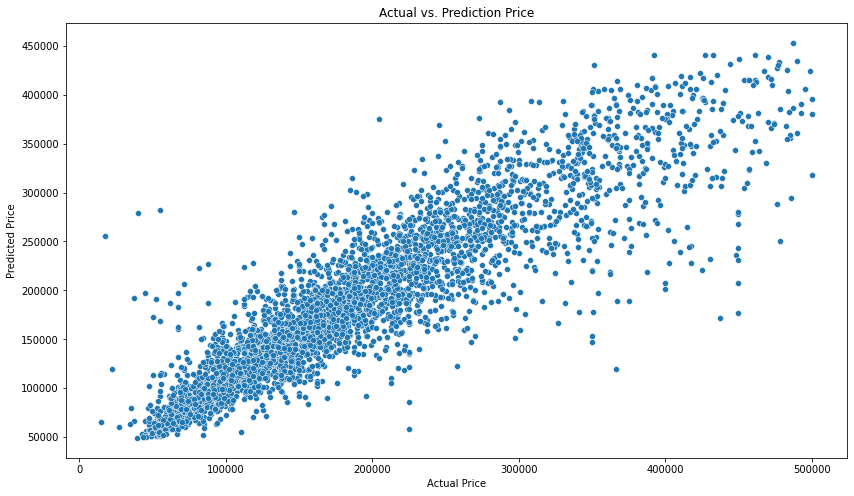

In [185]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_val, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Berdasarkan grafik diatas, perbandingan antara nilai harga yang diprediksi dengan harga actual terlihat cukup bagus dengan membentuk suatu pola yg linear. Namun masih terdapat sedikit error yang dimana terkadang ada data yang diprediksi nilainya rendah namun nilai aktualnya tinggi. tetapi hal ini masih dalam batas yang wajar mengingat nilai MAPE yang didapat 
yaitu 16% dimana artinya dapat dikategorikan kedalam 'Good forecast'

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances_.

In [186]:
transformer.transformers_

[('onehot',
  OneHotEncoder(drop='first', handle_unknown='ignore'),
  ['ocean_proximity']),
 ('imp_scal',
  Pipeline(steps=[('imputer', IterativeImputer()),
                  ('scaler', PowerTransformer(method='box-cox'))]),
  ['total_bedrooms', 'bedrooms_per_room']),
 ('scaler',
  PowerTransformer(method='box-cox'),
  ['housing_median_age',
   'total_rooms',
   'population',
   'households',
   'median_income',
   'rooms_per_household',
   'population_per_household']),
 ('remainder', 'passthrough', [0, 1])]

In [187]:
print(transformer.transformers_[0][1].get_feature_names())
print(transformer.transformers_[1][2])
print(transformer.transformers_[2][2])

['x0_INLAND' 'x0_ISLAND' 'x0_NEAR BAY' 'x0_NEAR OCEAN']
['total_bedrooms', 'bedrooms_per_room']
['housing_median_age', 'total_rooms', 'population', 'households', 'median_income', 'rooms_per_household', 'population_per_household']


In [188]:
df_model.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [189]:
features = (list(transformer.transformers_[0][1].get_feature_names()) + 
                transformer.transformers_[1][2] + 
                transformer.transformers_[2][2] + 
                ['longitude','latitude'])

features

['x0_INLAND',
 'x0_ISLAND',
 'x0_NEAR BAY',
 'x0_NEAR OCEAN',
 'total_bedrooms',
 'bedrooms_per_room',
 'housing_median_age',
 'total_rooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'population_per_household',
 'longitude',
 'latitude']

In [190]:
len(features)

15

In [191]:
xgb_tuning

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['ocean_proximity']),
                                                 ('imp_scal',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer(method='box-cox'))]),
                                                  ['total_bedrooms',
                                                   'bedrooms_per_room']),
                                                 ('s

In [192]:
feature_importances = pd.DataFrame(data = xgb_tuning[1].feature_importances_, index = features, columns = ["coef"])
feature_importances.sort_values(by = ["coef"], ascending = False, inplace = True)
feature_importances

,coef
x0_INLAND,0.540570
median_income,0.184075
population_per_household,0.050261
longitude,0.041606
latitude,0.038357
bedrooms_per_room,0.036624
rooms_per_household,0.024179
housing_median_age,0.017053
x0_NEAR OCEAN,0.014972
population,0.011659


<AxesSubplot:>

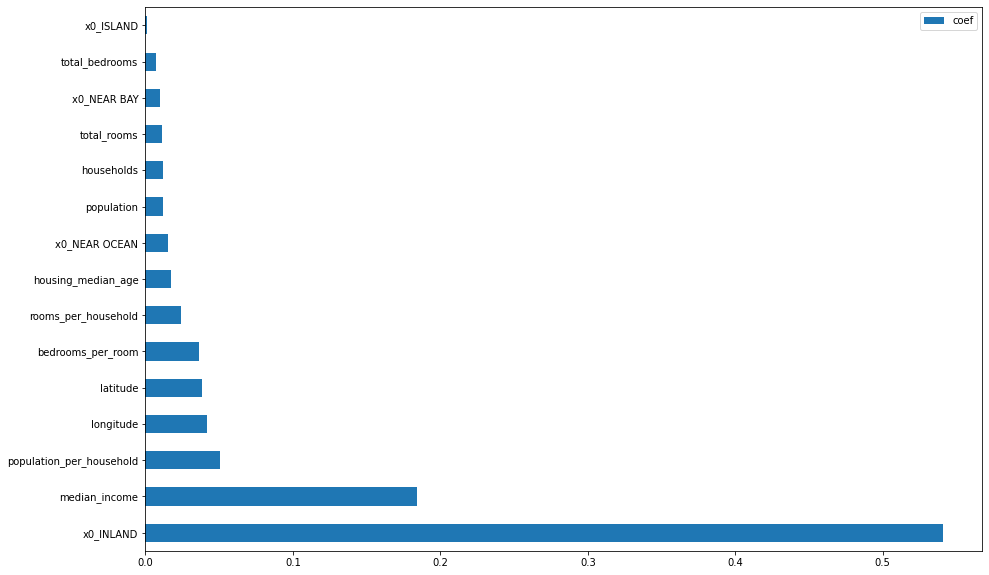

In [193]:
feature_importances.plot(kind = "barh", figsize = (15,10))

# **5. Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, fitur 'ocean_proximity' dan 'median_income' menjadi fitur yang paling berpengaruh terhadap 'median_house_value'.

Hal ini cukup wajar artinya kita dapat mengkonfirmasi bahwa lokasi ternyata masih menjadi predictor yang paling kuat dalam menentukan harga suatu rumah. semakin rumah tersebut berada dalam area / kawasan yang elit, tentu saja harga rumah nya akan tinggi dan juga sebaliknya. Dalam kasus ini rumah yg berada di kawasan pinggir dengan view laut merupakan rumah yang paling mahal dibandingkan dengan rumah yang berada di lokasi lainnya. 

Hal ini juga berbanding lurus dengan fitur median income, dimana rata-rata penghasilan seseorang dalam suatu area akan menentukan harga rumah di sekitarnya. semakin besar rata-rata penghasilan seseorang di area tersebut, maka akan semakin mahal harga rumahnya, begitu pula sebaliknya.

Jika kita melihat berdasarkan nilai RMSE, didapati nilai RMSE cukup tinggi, hal ini dikarenakan metric RMSE memiliki beberapa kelemahan: RMSE tergantung oleh scala dari data, jadi semakin besar skala, maka nilai RMSE nya juga besar. RMSE juga dipengaruhi oleh outlier, semakin banyak outlier maka RMSE juga bisa semakin besar. seperti yang kita ketahui data kita memiliki outlier yg cukup banyak, tapi jika outlier nya dihilangkan maka kita akan loss informasi yang banyak pula.
oleh karena itu pada kasus ini saya lebih melihat hasil pemodelan menggunakan metric MAPE yang tidak terlalu sensitive terhadap adanya outlier, dimana hasil dari metric MAPE sendiri yg sebesar 16% yang artinya persen kesalahan hasil prediksi data dibanding data actual hanya sekitar 16%. Selain itu nilai MAPE 16% artinya termasuk kedalam kategory 'Good Forecast' atau model peramalan baik.


# **6.Recommendation**

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi :

1. Penambahan fitur-fitur yang memiliki korelasi langsung dengan harga suatu rumah, misal luas rumah, fasilitas rumah, perusahaan developernya , dll.
<br><br>
2. Data perlu diperbaharui karena data yang digunakan merupakan data yang sudah lama yaitu tahun 1990. data ini tentu saja sudah sangat tidak relevan dengan kondisi pada saat ini. karena adanya faktor inflasi dan sebagainya.
<br><br>
3. Dari sisi modeling mungkin dapat ditingkatkan dengan metode hyperparameter yang lebih baik seperti gridsearch. metode gridsearch mencoba seluruh kombinasi hyperparameter. sedangkan pada randomized search yang kita gunakan dalam model tidak semua kombinasi hyperparameter dicoba tetapi kita memilih secara acak dari seluruh kemungkinan kombinasi.
<br><br>
4. Model ini dapat digunakan untuk prediksi harga perumahan yang memiliki fitur sejenis dengan dataset California house. Karena jika dilihat dari perbandingan nilai train dan test nya, performa model cukup stabil artinya model cenderung tidak overfitting/underfitting. Namun perlu diingat kembali bahwa data ini merupakan harga rumah di tahun 1990, yang tentu saja akan jauh berbeda dengan harga rumah di tahun sekarang, ini berkaitan dengan range harga harga yang akan diprediksi, karena jika range nya melewati atau diluar range harga dalam model, maka hasilnya akan menjadi bias

# **Save Model**

In [250]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('California_Housing_XGB.sav', 'wb'))

In [251]:
# Load model
filename = 'California_Housing_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [252]:
np.sqrt(mean_squared_error(y_val, loaded_model.predict(X_val)))

43002.35393713988

# Additional

---

In [194]:
# X_train_prep = pd.DataFrame(transformer.fit_transform(X_train))
# X_test_prep = pd.DataFrame(transformer.transform(X_val))

In [253]:
# X_train_prep.columns = features
# X_test_prep.columns = features

In [254]:
# xgbmodel = XGBRegressor(random_state=1)
# xgbmodel.fit(X_train_prep,y_train)

In [200]:
import statsmodels.api as sm
from statsmodels.api import OLS


df_ols = pd.DataFrame(transformer.fit_transform(df_model))
df_ols_feature = features + ['median_house_value'] 
df_ols.columns = df_ols_feature
df_ols

x = df_ols.drop(['median_house_value'],axis=1) #independent variable
y = df_ols['median_house_value'] # dependent variable

model_ols = sm.OLS(y,sm.add_constant(x))
result_ols = model_ols.fit()
print(result_ols.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1393.
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:53:19   Log-Likelihood:            -1.6132e+05
No. Observations:               13000   AIC:                         3.227e+05
Df Residuals:                   12984   BIC:                         3.228e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

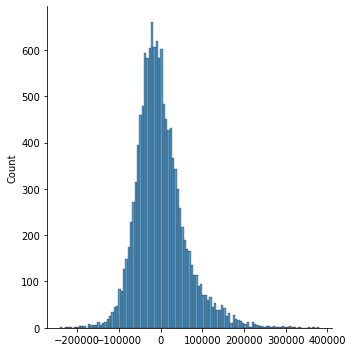

In [201]:
sns.displot(result_ols.resid)

In [202]:
from scipy.stats import kstest # uji normalitas dengan kolmogorov smirnov

key, pval = kstest(result_ols.resid, 'norm')

if pval < 0.05:
    print('data berdistribusi tidak normal')
else:
    print('data berdistribusi normal')

data berdistribusi tidak normal


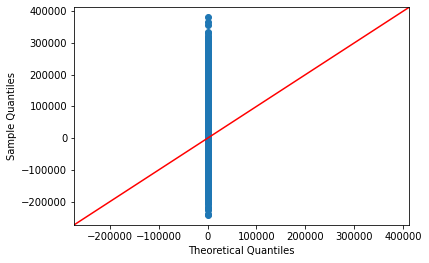

In [203]:
sm.qqplot(result_ols.resid, line='45')
plt.show()

Text(0, 0.5, 'residual')

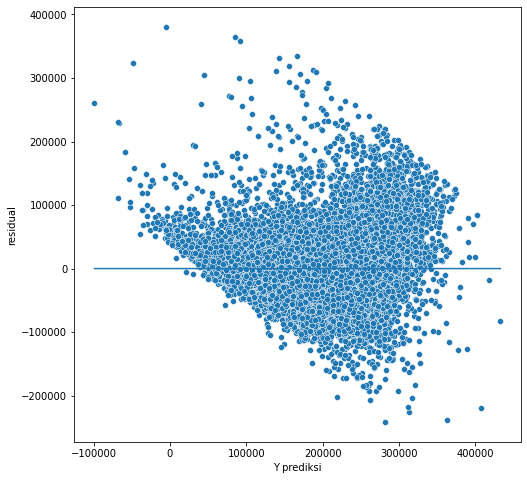

In [204]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=result_ols.fittedvalues, y= result_ols.resid)
sns.lineplot(x=result_ols.fittedvalues,y=0)

plt.xlabel('Y prediksi')
plt.ylabel('residual')

In [205]:
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variabel'] = x.columns
    vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return vif

In [206]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
model_vif = sm.add_constant(x).drop(['const'],axis=1)
calc_vif(model_vif)

,variabel,vif
0,x0_INLAND,3.064844
1,x0_ISLAND,1.000695
2,x0_NEAR BAY,1.472277
3,x0_NEAR OCEAN,1.320750
4,total_bedrooms,93.833520
5,bedrooms_per_room,13.626419
6,housing_median_age,1.295059
7,total_rooms,200.236837
8,population,125.109609
9,households,261.442421


In [207]:
calc_vif(model_vif[['x0_INLAND','x0_ISLAND','x0_NEAR BAY','x0_NEAR OCEAN','population','housing_median_age','median_income']])

,variabel,vif
0,x0_INLAND,1.108535
1,x0_ISLAND,1.000180
2,x0_NEAR BAY,1.026202
3,x0_NEAR OCEAN,1.001565
4,population,1.086774
5,housing_median_age,1.208113
6,median_income,1.108623


---